In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### follow this https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv

In [2]:
# follow this https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
df_heart = pd.read_csv('heart.csv')

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_heart.memory_usage(index=False)

age         2424
sex         2424
cp          2424
trestbps    2424
chol        2424
fbs         2424
restecg     2424
thalach     2424
exang       2424
oldpeak     2424
slope       2424
ca          2424
thal        2424
target      2424
dtype: int64

In [4]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_original = df_heart.copy()

In [6]:
# identifying categorical variable in dataframe
for col in df_heart.columns:
    print(f'{col} has unique value count : {len(df_heart[col].unique())}')

age has unique value count : 41
sex has unique value count : 2
cp has unique value count : 4
trestbps has unique value count : 49
chol has unique value count : 152
fbs has unique value count : 2
restecg has unique value count : 3
thalach has unique value count : 91
exang has unique value count : 2
oldpeak has unique value count : 40
slope has unique value count : 3
ca has unique value count : 5
thal has unique value count : 4
target has unique value count : 2


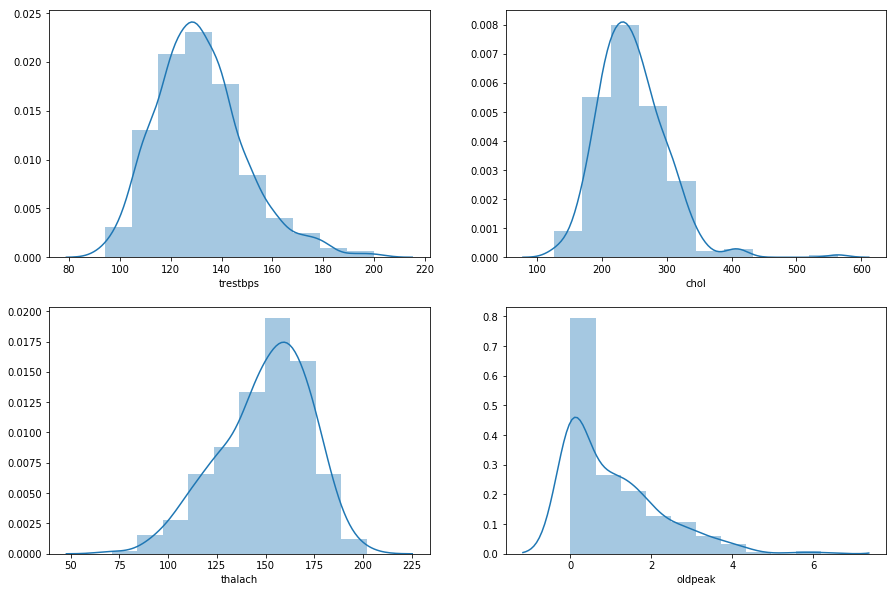

In [7]:
# continious distribued column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.distplot(df_heart['trestbps'], bins=10,ax=axes[0,0])
sns.distplot(df_heart['chol'], bins=10,ax=axes[0,1])
sns.distplot(df_heart['thalach'], bins=10,ax=axes[1,0])
sns.distplot(df_heart['oldpeak'], bins=10,ax=axes[1,1])

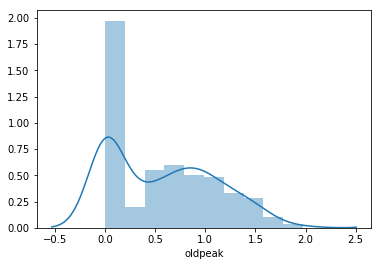

In [8]:
sns.distplot(np.log(df_heart['oldpeak']+1), bins=10)

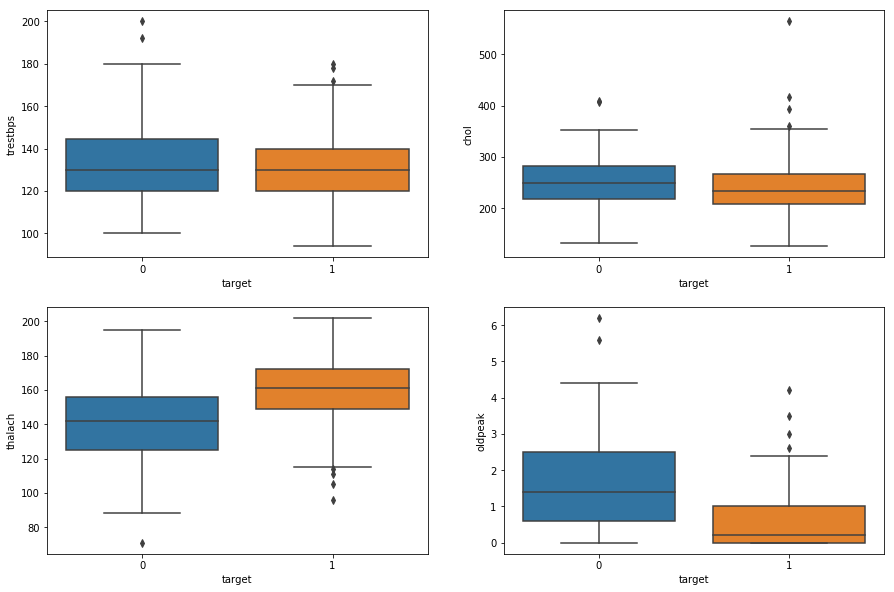

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(y='trestbps', x= 'target', data=df_heart,ax=axes[0,0])
sns.boxplot(y='chol', x= 'target', data=df_heart,ax=axes[0,1])
sns.boxplot(y='thalach', x= 'target', data=df_heart,ax=axes[1,0])
sns.boxplot(y='oldpeak', x= 'target', data=df_heart,ax=axes[1,1])

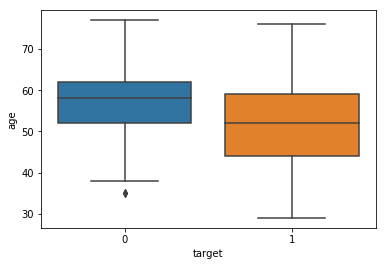

In [10]:
sns.boxplot(y='age', x= 'target', data=df_heart)

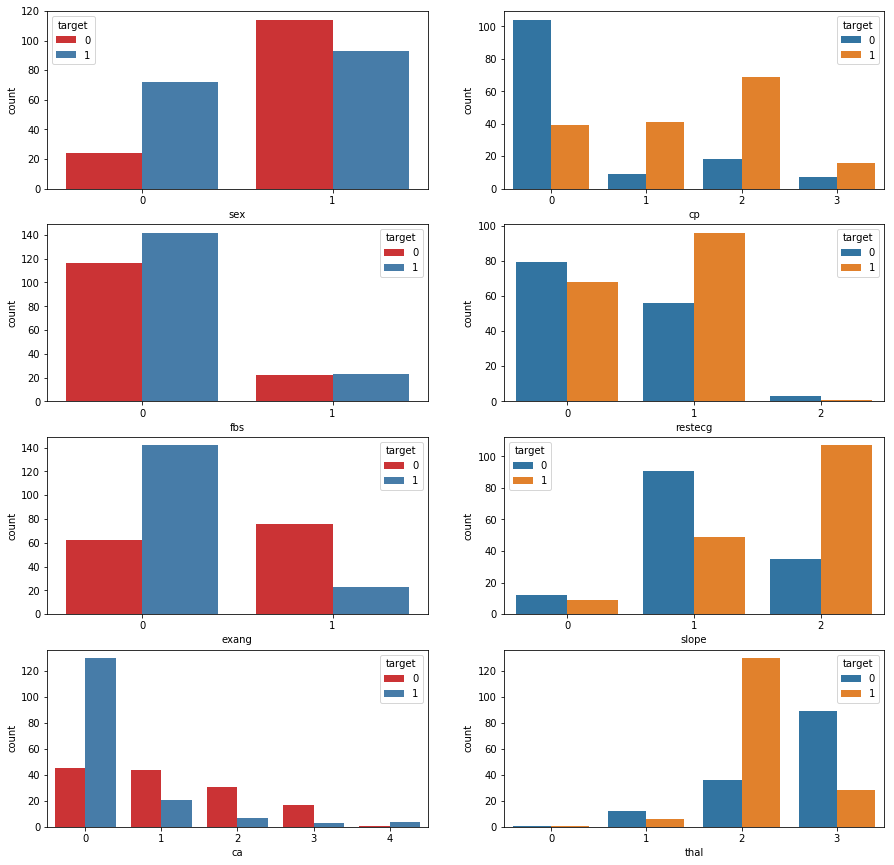

In [11]:
# categoricala column on basis of heart disease
# 0 - no heart disease
# 1 - heart disease
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

sns.countplot(x='sex',data=df_heart, hue='target', ax=axes[0,0],palette="Set1") #1 = male' 0 = female
sns.countplot(x='cp',data=df_heart, hue='target', ax=axes[0,1]) # chest pain type
sns.countplot(x='fbs',data=df_heart, hue='target', ax=axes[1,0],palette="Set1") # fasting blood sugar label>120 mg/dl (1 = true; 0 = false)
sns.countplot(x='restecg',data=df_heart, hue='target', ax=axes[1,1]) # resting blood pressure
sns.countplot(x='exang',data=df_heart, hue='target', ax=axes[2,0],palette="Set1") # exercise induced angina (1 = yes; 0 = no)
sns.countplot(x='slope',data=df_heart, hue='target', ax=axes[2,1]) # the slope of the peak exercise ST segment
sns.countplot(x='ca',data=df_heart, hue='target', ax=axes[3,0],palette="Set1") # number of major vessel (0-3) colored by flourosopy
sns.countplot(x='thal',data=df_heart, hue='target', ax=axes[3,1])

- persons having blood sugar label less than 120 mg/dl are more prone to heart disease
- person having 'thal' label as 2 have higher probability to have heart disease
- person having major vessel color = 0 has large probability of heart disease

In [12]:
# creating dummy variables for all categorical variables

df_cp = pd.get_dummies(df_heart['cp'], drop_first=True, prefix='chest_pain')

df_restecg = pd.get_dummies(df_heart['restecg'], drop_first=True, prefix='electrocardiographic')

df_slope = pd.get_dummies(df_heart['slope'], drop_first=True, prefix='slope')

df_thal = pd.get_dummies(df_heart['thal'], drop_first=True, prefix='thal_defect')

df_ca = pd.get_dummies(df_heart['ca'], drop_first=True, prefix='flourosopy')

df_heart = pd.concat([df_heart, df_cp, df_restecg, df_slope, df_thal, df_ca], axis = 1)

In [13]:
# droping the categorical varaibles
df_heart = df_heart.drop(['cp', 'restecg', 'slope', 'thal', 'ca'], axis=1)

df_heart = df_heart.sample(frac=1,random_state=42).reset_index().drop('index', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_heart, test_size=0.2)

In [15]:
df_train.shape, df_test.shape

((242, 23), (61, 23))

In [16]:
numerical_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
df_train[numerical_col] = scaler.fit_transform(df_train[numerical_col])

In [17]:
y_train = df_train.pop('target')
y_test = df_test.pop('target')

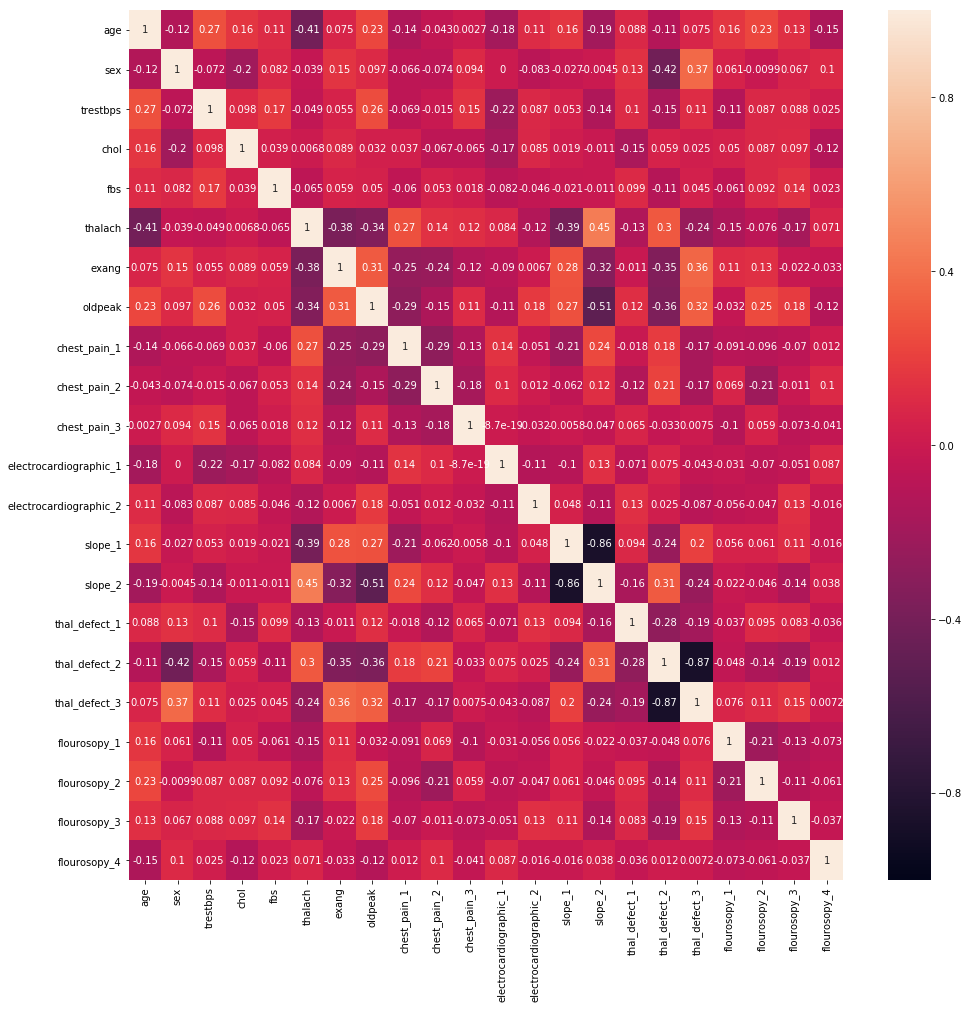

In [18]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(), annot=True, vmax=1, vmin=-1)

 slope_1 and slope_2 are corelated to each other
 thal_defect_2 and thal_defect_3 are corelated to each other

In [19]:
df_train = df_train.drop(['slope_1','thal_defect_2'], axis=1)
df_test = df_test.drop(['slope_1','thal_defect_2'], axis=1)

In [20]:
df_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,chest_pain_1,chest_pain_2,chest_pain_3,electrocardiographic_1,electrocardiographic_2,slope_2,thal_defect_1,thal_defect_3,flourosopy_1,flourosopy_2,flourosopy_3,flourosopy_4
245,0.595238,1,0.377358,0.255245,0,0.733871,0,0.129032,0,0,1,1,0,1,0,0,0,1,0,0
13,0.142857,1,0.150943,0.125874,0,0.346774,1,0.322581,0,0,0,0,0,0,0,1,0,0,0,0
273,0.690476,0,0.386792,0.423077,0,0.814516,0,0.000000,0,1,0,0,0,1,0,0,0,0,0,0
285,0.523810,1,0.245283,0.381119,0,0.790323,0,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
194,0.476190,1,0.132075,0.622378,0,0.685484,0,0.000000,1,0,0,1,0,1,0,1,0,0,0,0


In [21]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression().fit(df_train, y_train)

In [22]:
logreg_model.score(df_train, y_train)

0.8842975206611571

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:

y_test_pred = logreg_model.predict(df_test)

confusion_matrix(y_test, y_test_pred)

array([[ 0, 30],
       [ 0, 31]], dtype=int64)

In [25]:
# pred              negative     positive
# actual
#        negative     TN           FP
#        positive     FN           TP

In [26]:
y_train_pred = logreg_model.predict(df_train)

confusion_matrix(y_train, y_train_pred)

array([[ 91,  17],
       [ 11, 123]], dtype=int64)

## Decision Tree

In [33]:
X = df_original.drop(['target'], axis=1)
y = df_original['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 99)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

n_folds = 5
parameters = {'max_depth': range(1, 10),
              }

dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

c:\users\suryansh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [35]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002997,6.316582e-04,0.001205,4.099168e-04,1,{'max_depth': 1},0.693878,0.775510,0.708333,0.854167,0.791667,0.764463,0.058320,3,0.782383,0.761658,0.778351,0.742268,0.757732,0.764478,0.014559
1,0.002402,7.973313e-04,0.001000,3.015783e-07,2,{'max_depth': 2},0.693878,0.673469,0.708333,0.729167,0.791667,0.719008,0.040472,9,0.782383,0.782383,0.778351,0.747423,0.757732,0.769654,0.014395
2,0.002409,4.942297e-04,0.000998,4.036533e-06,3,{'max_depth': 3},0.775510,0.795918,0.687500,0.833333,0.875000,0.793388,0.062670,1,0.823834,0.839378,0.876289,0.840206,0.845361,0.845014,0.017214
3,0.001999,8.313940e-07,0.000999,6.572747e-07,4,{'max_depth': 4},0.734694,0.734694,0.770833,0.666667,0.854167,0.752066,0.060879,5,0.886010,0.891192,0.896907,0.912371,0.876289,0.892554,0.012008
4,0.002594,7.912667e-04,0.000599,4.894342e-04,5,{'max_depth': 5},0.775510,0.734694,0.729167,0.750000,0.854167,0.768595,0.045516,2,0.932642,0.927461,0.969072,0.958763,0.953608,0.948309,0.015802


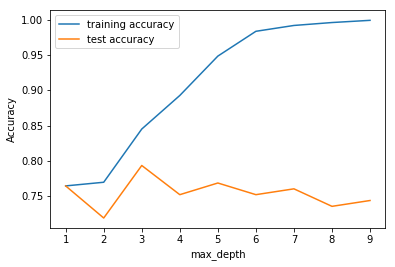

In [36]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 2),
    'min_samples_leaf': range(5, 50, 5),
    'min_samples_split': range(5, 50, 5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train,y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4050 out of 4050 | elapsed:   19.6s finished
c:\users\suryansh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 10, 2), 'min_samples_leaf': range(5, 50, 5), 'min_samples_split': range(5, 50, 5), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [38]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.5743801652892562
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=35,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [40]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=15,
                                  min_samples_split=35)
clf_gini.fit(df_train, y_train)

# score
print(clf_gini.score(df_test,y_test))

0.3770491803278688


In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

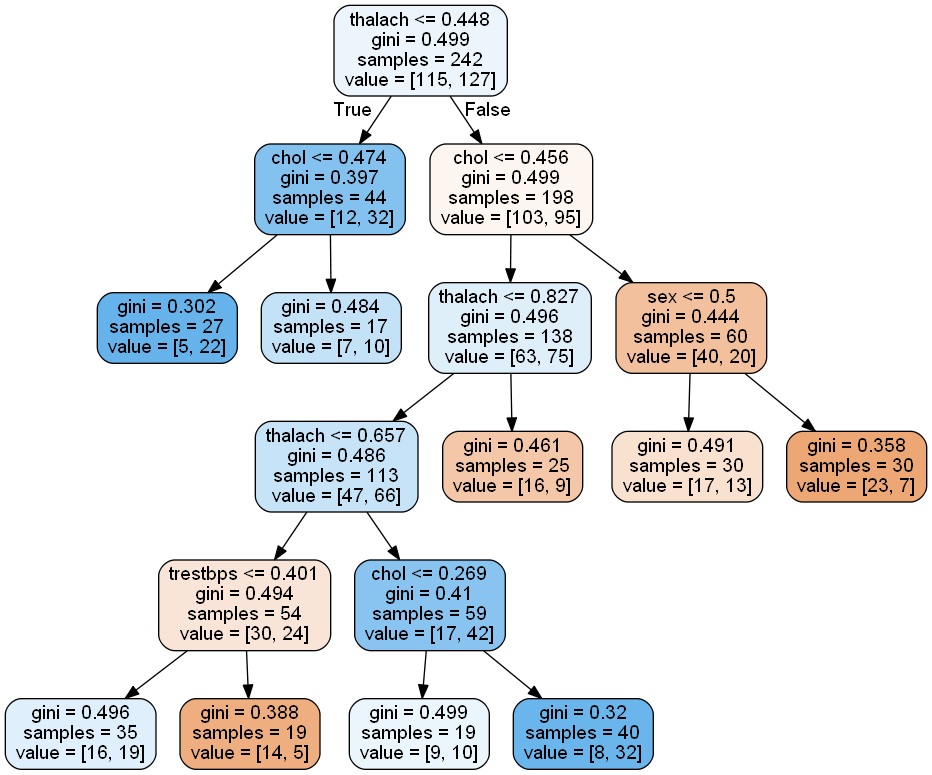

In [43]:
features = list(df_test.columns)
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [44]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:

predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.92      0.87      0.89        38

   micro avg       0.87      0.87      0.87        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61



In [46]:
confusion_matrix(y_test, predictions)

array([[20,  3],
       [ 5, 33]], dtype=int64)

In [47]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[115,   0],
       [  0, 127]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8688524590163934

In [49]:
accuracy_score(y_train, rfc.predict(X_train) )

1.0